## Esercitazione 1 Aprile 2025

 # Implementare le function corde, secanti, Newton per il calcolo degli zeri di equazioni non lineari.

In [37]:
import numpy as np

def metodo_bisezione(fname, a, b, tolx, tolf):
    fa=fname(a)
    fb=fname(b)
    if np.sign(fa) * np.sign(fb) > 0:
        print("Non è possibile applicare il metodo di bisezione \n")
        return None, None,None

    nmax = np.ceil(np.log2((b - a) / tolx)) - 1 # massimo numero di iterazioni richieste per ridurre il range [a, b] a tolx
    it = 0
    v_xk = []
    xk_prec = None
    xk = a
    fxk = tolf + 1
    errore = tolx + 1
    
    while (
        it < maxit and
        np.abs(fxk) > tolf and
        errore > tolx
    ):
        xk_prec = xk
        xk = a + ((b - a) / 2) # più stabile rispetto (b + a) / 2
        v_xk.append(xk)
        it += 1
        fxk=fname(xk)
        if fxk==0:
            return xk, it, v_xk
    
        if np.sign(fb) * np.sign(fxk) < 0: # la radice è nel range [xk, b]
            a = xk
            fa= fxk 
        elif np.sign(fa) * np.sign(fxk) < 0: # la radice è nel range [a, xk]
            b = xk
            fb= fxk

        errore = np.abs(xk - xk_prec) / (np.abs(xk) if xk != 0 else 1)

    return xk, it, np.array(v_xk)

def falsa_posizione(fname, a, b, tolx, tolf, maxit):
    fa=fname(a)
    fb=fname(b)
    if np.sign(fa) * np.sign(fb) > 0:
        print("Non è possibile applicare il metodo di di regula falsi\n")
        return None, None,None
    
    it = 0
    v_xk = []
    xk_prec = None
    xk = a
    fxk = tolf + 1
    errore = tolx + 1
    
    while (
        it < maxit and
        np.abs(fxk) > tolf and
        errore > tolx
    ):
        xk_prec = xk
        xk = a - fa*((b - a) / (fb - fa))
        v_xk.append(xk)
        it += 1
        fxk=fname(xk)
        if fxk==0:
            return xk, it, v_xk
    
        if np.sign(fb) * np.sign(fxk) < 0: # la radice è nel range [xk, b]
            a = xk
            fa= fxk 
        elif np.sign(fa) * np.sign(fxk) < 0: # la radice è nel range [a, xk]
            b = xk
            fb= fxk

        errore = np.abs(xk - xk_prec) / (np.abs(xk) if xk != 0 else 1)

    return xk, it, np.array(v_xk)

def corde(fname,coeff_ang,x0,tolx,tolf,nmax):
    # coeff_ang è il coefficiente angolare della retta che rimane fisso per tutte le iterazioni
    xk=[]
    
    it=0
    errorex=1+tolx
    erroref=1+tolf
    
    while (
        it < nmax and
        errorex > tolx and
        erroref > tolf
    ):
        fx0=fname(x0)
        d= fx0 / coeff_ang
        x1= x0 - d
        fx1= fname(x1)
        if x1!=0:
            errorex=np.abs(d) / np.abs(x1) 
        else:
            errorex=np.abs(d)
       
        erroref=np.abs(fx1)

        x0=x1
        it=it+1
        xk.append(x1)
        if it==nmax:
            print('Corde : raggiunto massimo numero di iterazioni \n')
        
    return x1,it,np.array(xk)

def secanti(fname,xm1,x0,tolx,tolf,nmax):
    xk=[]
    
    it=0
    errorex=1+tolx
    erroref=1+tolf
    while (
        it < nmax and
        errorex > tolx and
        erroref > tolf
    ):
        
        fxm1=fname(xm1)
        fx0=fname(x0)
        d=fx0 * ((xm1 - x0) / (fxm1 - fx0))
    
        x1=x0 - d
      
        
        fx1=fname(x1)
        xk.append(x1);
        if x1!=0:
            errorex=np.abs(d) / np.abs(x1)
        else:
            errorex=np.abs(d)
            
        erroref=np.abs(fx1)
        xm1=x0
        x0=x1
        
        it=it+1;
       
    
    if it==nmax:
        print('Secanti: raggiunto massimo numero di iterazioni \n')
    
    return x1,it,np.array(xk)

def newton(fname,fpname,x0,tolx,tolf,nmax):
  
    xk=[]
       
    it=0
    errorex=1+tolx
    erroref=1+tolf
    while (
        it < nmax and
        errorex > tolx and
        erroref > tolf
    ):
        
        fx0=fname(x0)
        fpx0 = fpname(x0)
        if np.abs(fpx0) <= np.spacing(1):
            print("Newton: derivata prima nulla in x0")
            return None, None,None
        d= fx0 / fpx0

        x1=x0 - d
        fx1=fname(x1)
        erroref=np.abs(fx1)
        if x1!=0:
            errorex=np.abs(d) / np.abs(x1)
        else:
            errorex=np.abs(d)

        it=it+1
        x0=x1
        xk.append(x1)
          
        if it==nmax:
            print('Newton: raggiunto massimo numero di iterazioni \n')
            
        
    return x1,it,np.array(xk)

In [2]:
def stima_ordine(xk,iterazioni):
     #Vedi dispensa allegata per la spiegazione

      k=iterazioni-4
      p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
     
      ordine=p
      return ordine

## Esercizio 1 

 Confrontare tutti i metodi implementati (bisezione, falsa posizione, corde, secanti, Newton) nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.

Calcolare l'ordine di ciascun metodo.


Scegli funzione [1-4]: 2


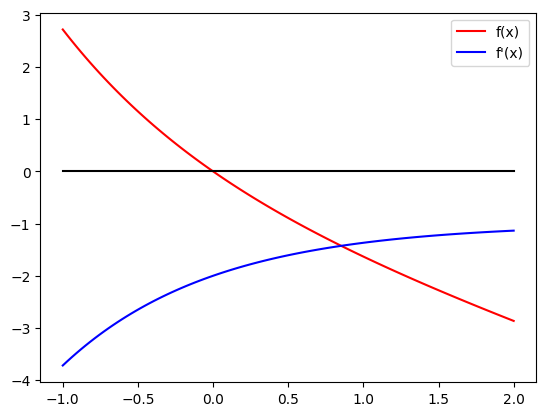

alfa: 0
f: -x - 1 + exp(-x)
f': -1 - exp(-x)

Bisezione
 - zero: 4.547473508864641e-13
 - iterazioni: 41
 - ordine: 1.0
Regula falsi:
 - zero: 3.2573943542502093e-13
 - iterazioni: 22
 - ordine: 1.0001381592601961
Corde:
 - zero: 7.595339038295469e-14
 - iterazioni: 12
 - ordine: 1.0000007338050891
Secanti:
 - zero: -4.0418004209038996e-13
 - iterazioni: 6
 - ordine: 1.6905911808496086
Newton:
 - zero: 2.8717300049945835e-17
 - iterazioni: 5
 - ordine: 2.002326546649064


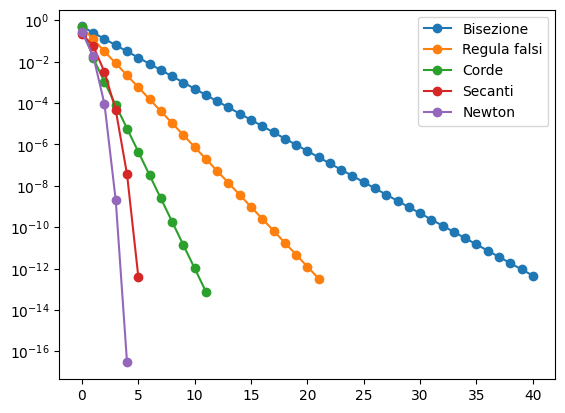

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

opt = int(input("Scegli funzione [1-4]:"))
x = sym.symbols("x")
tolx = tolf = 1.e-12

match opt:
    case 1:
        f = x**3 -6*x**2 -4*x +24
        a = -3
        b = 8
        alfa = 6
        x0 = 5
        xm1 = 5.2
    case 2:
        f = sym.exp(-x) - (x + 1)
        a = -1
        b = 2
        alfa = 0
        x0 = -1
        xm1 = -0.8
    case 3:
        f = sym.log(x + 3, 2) - 2
        a = -1
        b = 2
        alfa = 1
        x0 = 0
        xm1 = 0.2
    case 4:
        f = sym.sqrt(x) - (x**2) / 4
        a = 1
        b = 3
        alfa = 2**(4/3)
        x0 = 2**(4/3) - 1
        xm1 = 2**(4/3) + 0.8

df = sym.diff(f, x, 1)
f_lambda = sym.lambdify(x, f, np)
df_lambda = sym.lambdify(x, df, np)

x = np.linspace(a, b, 100)
plt.plot(x, f_lambda(x), "r")
plt.plot(x, df_lambda(x), "b")
plt.plot(x, np.zeros_like(x), "black")
plt.legend(["f(x)", "f'(x)"])
plt.show()

maxit = 1000
coeff_ang=(f_lambda(b)-f_lambda(a))/(b-a)

print("alfa:", alfa)
print("f:", f)
print("f':", df)
print()
bis_zero, bis_it, bis_xk = metodo_bisezione(f_lambda, a, b, tolx, tolf)
print("Bisezione")
print(" - zero:", bis_zero)
print(" - iterazioni:", bis_it)
print(" - ordine:", stima_ordine(bis_xk, bis_it))
plt.semilogy(range(bis_it), np.abs(bis_xk - alfa), "-o")

falsi_zero, falsi_it, falsi_xk = falsa_posizione(f_lambda, a, b, tolx, tolf, maxit)
print("Regula falsi:")
print(" - zero:", falsi_zero)
print(" - iterazioni:", falsi_it)
print(" - ordine:", stima_ordine(falsi_xk, falsi_it))
plt.semilogy(range(falsi_it), np.abs(falsi_xk - alfa), "-o")

corde_zero, corde_it, corde_xk = corde(f_lambda, coeff_ang, x0, tolx, tolf, maxit)
print("Corde:")
print(" - zero:", corde_zero)
print(" - iterazioni:", corde_it)
print(" - ordine:", stima_ordine(corde_xk, corde_it))
plt.semilogy(range(corde_it), np.abs(corde_xk - alfa), "-o")

sec_zero, sec_it, sec_xk = secanti(f_lambda, xm1, x0, tolx, tolf, maxit)
print("Secanti:")
print(" - zero:", sec_zero)
print(" - iterazioni:", sec_it)
print(" - ordine:", stima_ordine(sec_xk, sec_it))
plt.semilogy(range(sec_it), np.abs(sec_xk - alfa), "-o")

new_zero, new_it, new_xk = newton(f_lambda, df_lambda, x0, tolx, tolf, maxit)
print("Newton:")
print(" - zero:", new_zero)
print(" - iterazioni:", new_it)
print(" - ordine:", stima_ordine(new_xk, new_it))
plt.semilogy(range(new_it), np.abs(new_xk - alfa), "-o")

plt.legend(["Bisezione", "Regula falsi", "Corde", "Secanti", "Newton"])
plt.show()

Calcolare gli zeri della funzione $f(x)=x^4-9x^2+4x+12$ definita sul'intervallo [-4,4] usando i metodi di Newton, corde e secandi, scegliendo opportunamente l'iterato iniziale per ogni metodo.

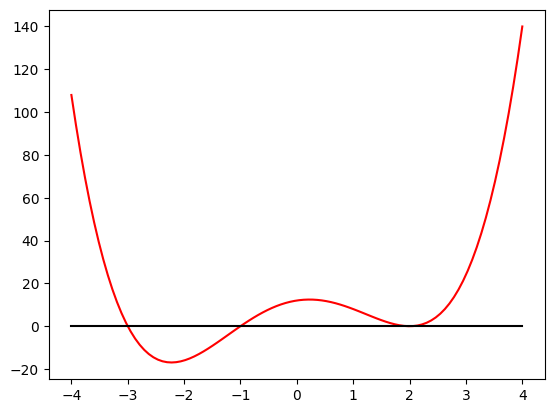

In [39]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

a = -4
b = 4

x = sym.symbols("x")
f = x**4 -9*x**2 +4*x +12
df = sym.diff(f, x, 1)
f_n = sym.lambdify(x, f, np)
df_n = sym.lambdify(x, df, np)

xx = np.linspace(a, b, 100)
plt.plot(xx, f_n(xx), "r")
plt.plot(xx, np.zeros_like(xx), "black")
plt.show()



# Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.

In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni effettuate, nit.


Implementare in altre due function `NewtonRaphson_Corde.py` e `NewtonRaphson_Sham.py` le varianti Corde e la variante di  Shamanskii


## Esercizio 1

Risolvere i seguenti cinque sistemi non lineari con tutti e tre i metodi e confrontare in scala logaritmica l'errore relativo tra due iterati successivi

    1) 
    2x0-cos(x1)=0

    sin(x0)+2x1=0

    2) 
    x0^2+x1^2-4=0

    x0^2-x1*2-1=0

    3) 
    x0^2+x1^2-2=0

    exp(x0-1)+x1^3-3
    
    4) 
    4x0^2+x_1^2^-4=0

    x0+x1-sin(x0-x1)=0

    5)

    x0+x1-3=0

    x0^2+x1^2-9=0
    
    
Per determinare l'iterato iniziale X 0 , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = fi (x1 ,x2 ) e z = h(x1 , x 2 ) e 
definire come iterato iniziale un vettore X 0 oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym


# Definizione variabili simboliche
x_sym, y_sym = symbols('x_sym y_sym')

# Definizione funzioni simboliche usando variabili simboliche 
       
f1_sym = lambda x_sym,y_sym: x_sym+y_sym-3   #[-1,1]
f2_sym= lambda x_sym,y_sym: x_sym**2+y_sym**2-9



def F_sym(f1_sym,f2_sym):
    return Matrix([[f1_sym(x_sym,y_sym)], [f2_sym(x_sym,y_sym)]])   

# Calcolo della matrice Jacobiana simbolicamente
J_sym = F_sym(f1_sym,f2_sym).jacobian(Matrix([x_sym, y_sym]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J_numerical = lambdify([x_sym, y_sym], J_sym, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F_numerical = lambdify([x_sym, y_sym], F_sym(f1_sym,f2_sym), np)


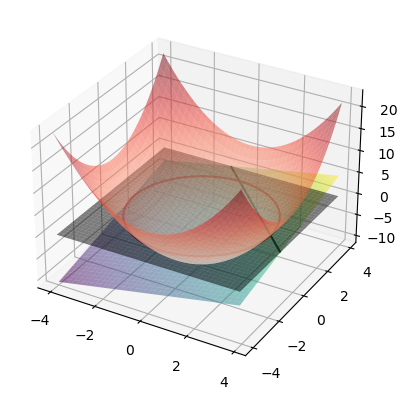

In [35]:

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z=np.zeros_like(X)
superfici=F_numerical(X,Y).squeeze()
 
# Plotta la superficie direttamente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0,:,:], cmap='viridis',alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1,:,:], cmap='Reds',alpha=0.5)
ax.plot_surface(X, Y, Z, cmap='gray',alpha=0.5)
plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')
 
plt.show()


# Implementare il metodo di Newton Raphson per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

Calcolare il punto di minimo delle seguenti tre funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x - 2)^4 + (x - 2)^2 y^2+(y+1)^2$$
   $$x^4+(x+y)^2y^2+(exp(x)-1)^2$$
   $$100(y-x^2)^2+(1-x_sym)^2$$